# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
bins = np.linspace(20,70,10)
sub_data = app_train[['YEARS_BIRTH','TARGET']]
sub_data['equal_width_rng'] = pd.cut(sub_data['YEARS_BIRTH'],bins,precision=1)
sub_data

C:\Users\Deeyo\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,YEARS_BIRTH,TARGET,equal_width_rng
0,25.920548,1,"(25.6, 31.1]"
1,45.931507,0,"(42.2, 47.8]"
2,52.180822,0,"(47.8, 53.3]"
3,52.068493,0,"(47.8, 53.3]"
4,54.608219,0,"(53.3, 58.9]"
...,...,...,...
307506,25.553425,0,"(20.0, 25.6]"
307507,56.917808,0,"(53.3, 58.9]"
307508,41.002740,0,"(36.7, 42.2]"
307509,32.769863,1,"(31.1, 36.7]"


In [6]:
sub_data['equal_width_rng'].value_counts()

(36.7, 42.2]    48283
(31.1, 36.7]    44237
(42.2, 47.8]    42567
(25.6, 31.1]    39200
(53.3, 58.9]    38342
(47.8, 53.3]    37461
(58.9, 64.4]    31934
(20.0, 25.6]    14458
(64.4, 70.0]    11029
Name: equal_width_rng, dtype: int64

In [7]:
sub_data['equal_width_rng'].unique().sort_values()

[(20.0, 25.6], (25.6, 31.1], (31.1, 36.7], (36.7, 42.2], (42.2, 47.8], (47.8, 53.3], (53.3, 58.9], (58.9, 64.4], (64.4, 70.0]]
Categories (9, interval[float64]): [(20.0, 25.6] < (25.6, 31.1] < (31.1, 36.7] < (36.7, 42.2] ... (47.8, 53.3] < (53.3, 58.9] < (58.9, 64.4] < (64.4, 70.0]]

Text(0.5, 1.0, 'Failure to Repay by Age Group')

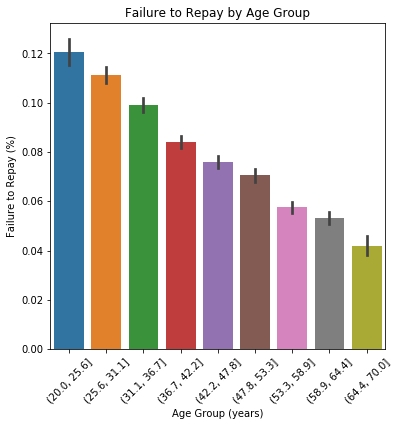

In [8]:
plt.figure(figsize = (6, 6))
x = sub_data['equal_width_rng']
y = sub_data['TARGET']

sns.barplot(x, y)
plt.xticks(rotation = 45)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [9]:
sub_data['total_income'] = app_train[['AMT_INCOME_TOTAL']]
sub_data

C:\Users\Deeyo\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YEARS_BIRTH,TARGET,equal_width_rng,total_income
0,25.920548,1,"(25.6, 31.1]",202500.0
1,45.931507,0,"(42.2, 47.8]",270000.0
2,52.180822,0,"(47.8, 53.3]",67500.0
3,52.068493,0,"(47.8, 53.3]",135000.0
4,54.608219,0,"(53.3, 58.9]",121500.0
...,...,...,...,...
307506,25.553425,0,"(20.0, 25.6]",157500.0
307507,56.917808,0,"(53.3, 58.9]",72000.0
307508,41.002740,0,"(36.7, 42.2]",153000.0
307509,32.769863,1,"(31.1, 36.7]",171000.0


In [10]:
sub_avg = sub_data.groupby('equal_width_rng').mean()

Text(0.5, 1.0, 'Average Income by Age group')

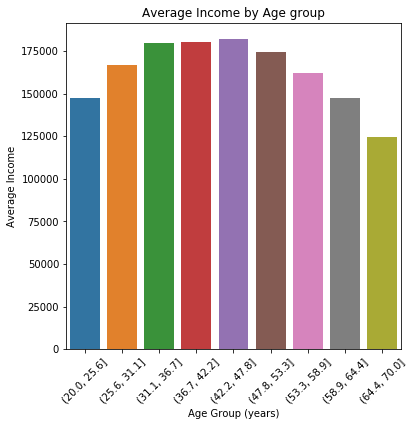

In [11]:
plt.figure(figsize = (6, 6))
x = sub_avg.index
y = sub_avg['total_income']
sns.barplot(x,y)
plt.xticks(rotation = 45)
plt.xlabel('Age Group (years)')
plt.ylabel('Average Income')
plt.title('Average Income by Age group')